# Benchmarking autonomous experimenation with Olympus

In this notebook we show how ``Olympus`` allows to readily test the performance of various experiment planning algortihms against the supported chemistry benchmarks.

Notes:
- when executing the first cell, you will receive a warning ("This notebook was not authored by Google"). Please select "Run Anyway" to be able to run the cells of the notebook.

In [ ]:
# we start by installing a couple of dependencies
!pip install silence-tensorflow
!pip install pyDOE
!pip install sobol_seq

In [ ]:
# finally, we install olympus itself
!pip install olymp[all]

In [ ]:
# get a list of available datasets 
from olympus import list_datasets
list_datasets()

['alkox',
 'benzylation',
 'colors_bob',
 'colors_n9',
 'fullerenes',
 'hplc',
 'photo_pce10',
 'photo_wf3',
 'snar',
 'suzuki']

In [ ]:
# get a list of available experiment planners 
from olympus import list_planners
list_planners()

['BasinHopping',
 'Cma',
 'ConjugateGradient',
 'DifferentialEvolution',
 'Genetic',
 'Gpyopt',
 'Grid',
 'Hyperopt',
 'LatinHypercube',
 'Lbfgs',
 'ParticleSwarms',
 'Phoenics',
 'RandomSearch',
 'Simplex',
 'Slsqp',
 'Snobfit',
 'Sobol',
 'SteepestDescent']

In [ ]:
# initalize the Olympus orchestrator
from olympus import Olympus
olymp = Olympus()

The `Olympus` class is the highest-level class in the package, which allows to run various algorithms with default settings against the desired benchmarks in a few lines of code. Lower-level usage of the package, which allow for more control by experienced users, is also possible as described in the documentation.

In [ ]:
# we declare a local database to which we store our campaign results
from olympus import Database
database = Database()

In [ ]:
from olympus import Campaign
from time import time

DATASET = 'hplc'
NUM_REPETITIONS = 3
PLANNERS = ['Gpyopt', 'Sobol', 'Genetic', 'RandomSearch']

elapsed_times = {'planner': [], 'time': []}
for PLANNER in PLANNERS:
  for repetition in range(NUM_REPETITIONS):
    print(f"Algorithm: {PLANNER} [repetition {repetition+1}]")

    start_time = time()
    olymp.run(
        planner=PLANNER,      # run simulation with <PLANNER>,
        dataset=DATASET,      # on emulator trained on dataset <DATASET>;
        campaign=Campaign(),  # store results in a new campaign, 
        database=database,    # but use the same database to store campaign;
        num_iter=100,         # run benchmark for 100 iterations
    )
    elapsed_time = time() - start_time
    elapsed_times['planner'].append(PLANNER)
    elapsed_times['time'].append(elapsed_time)

Algorithm: Gpyopt [repetition 1]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Gpyopt [repetition 2]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Gpyopt [repetition 3]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Sobol [repetition 1]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Sobol [repetition 2]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Sobol [repetition 3]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Genetic [repetition 1]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Genetic [repetition 2]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm: Genetic [repetition 3]
[INFO] Loading emulator using a BayesNeuralNet model for the dataset hplc...
Algorithm:

In [ ]:
# collect all campaigns
campaigns = [campaign for campaign in database]
for campaign in campaigns:
  print(repr(campaign))

<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Gpyopt, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Gpyopt, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Gpyopt, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Sobol, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Sobol, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Sobol, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Genetic, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Genetic, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=Genetic, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=RandomSearch, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=RandomSearch, num_iter=100)>
<Campaign (dataset=hplc, model=BayesNeuralNet, planner=RandomSearch, num_iter=100)>


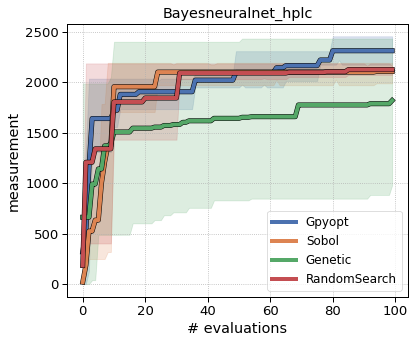

In [ ]:
from olympus import Plotter 
plotter = Plotter() 
plotter.plot_from_db(database)

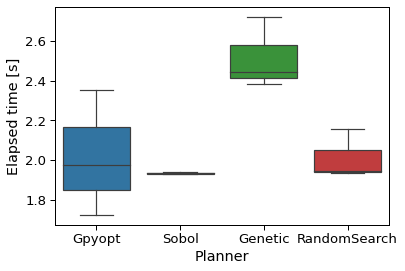

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(
    x='planner', 
    y='time',
    data=elapsed_times
)
plt.xlabel('Planner') 
plt.ylabel('Elapsed time [s]')
plt.show()

Note that the times reported here reflect not only the algorithm implementation, but also the implementation of their corresponding wrappers in Olympus. In practice, the computational cost of most experiment planners is negligible for the vast majority of practical chemistry experiments. Only the cost of Bayesian optimization algortihms (e.g., ``Phoenics`` and ``GPyOpt``) might be become substantial (i.e. several seconds per iteration) after a few hundres iterations.